In [6]:
import sympy as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

V = sm.Matrix(sm.symbols("V[0], V[1], V[2]"))
vdc = sm.Symbol("V_{dc}")
Ts = sm.Symbol("T_s")

Ml2n = vdc/3 * sm.Matrix([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])
MClark = sm.Rational(2, 3) * sm.Matrix([
    [1, sm.Rational(-1, 2), sm.Rational(-1, 2)],
    [0, sm.sqrt(3)/2, -sm.sqrt(3)/2]
])

Vref = sm.simplify(MClark * V)

swl = sm.Matrix(sm.symbols("swl[0], swl[1], swl[2]"))
swr = sm.Matrix(sm.symbols("swr[0], swr[1], swr[2]"))

Vl = sm.simplify(MClark * Ml2n * swl)
Vr = sm.simplify(MClark * Ml2n * swr)

A = sm.Matrix([[Vl, Vr]])
b = Ts*Vref

detA = sm.simplify(A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0])
detA = sm.Symbol("detA")

invA = sm.Matrix([
    [A[1, 1], -A[0, 1]],
    [-A[1, 0], A[0, 0]]
])
T = sm.simplify((1/detA * invA) * b)
Toff = sm.simplify(Ts - T[0] - T[1])

Vref

Matrix([
[2*V[0]/3 - V[1]/3 - V[2]/3],
[   sqrt(3)*(V[1] - V[2])/3]])

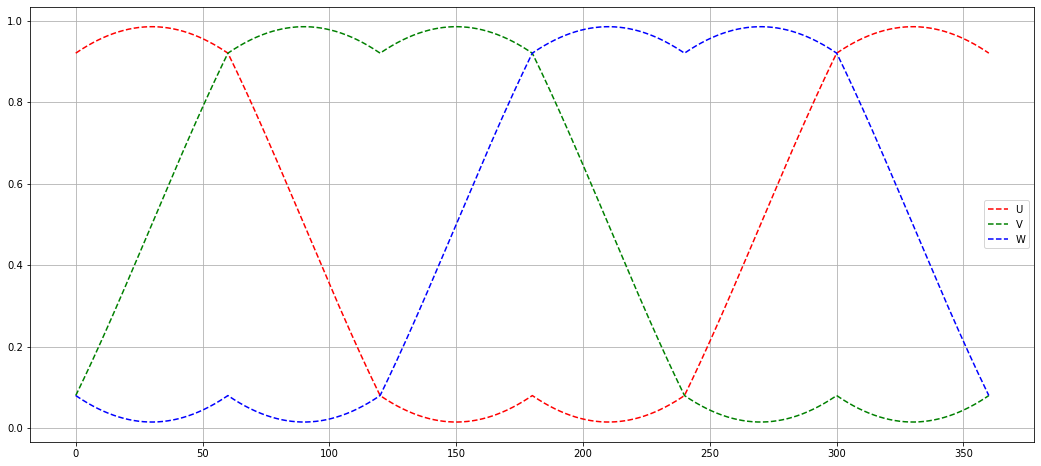

In [7]:
df = pd.read_csv("../PlainC/cmake-build-debug/export.csv", names=["t","U","V","W"])


t = np.rad2deg(df["t"].values)
a = df["U"].values
b = df["V"].values
c = df["W"].values

plt.figure(figsize=(18, 8))
plt.plot(t, a, 'r--', label='U')
plt.plot(t, b, 'g--', label='V')
plt.plot(t, c, 'b--', label='W');
plt.grid()
plt.legend();